In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("ipldata_19/matches.csv")

In [7]:
df.shape

(756, 18)

In [8]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
pd.value_counts(df['season'])

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [10]:
pd.value_counts(df['winner'])

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [16]:
df.drop_duplicates('season','last')[['season','winner']].reset_index(drop=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_30732\1256473611.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only.
  df.drop_duplicates('season','last')[['season','winner']].reset_index(drop=True)


,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [17]:
deliveries = pd.read_csv('ipldata_19/deliveries.csv')

In [18]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
deliveries.shape

(179078, 21)

In [19]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
six_df = deliveries[deliveries['batsman_runs'] == 6]

In [23]:
pd.value_counts(six_df['batsman']).head()

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman, dtype: int64

In [27]:
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [28]:
deliveries.groupby(['batsman','match_id'])['batsman_runs'].sum().sort_values(ascending=False).head()

batsman         match_id
CH Gayle        411         175
BB McCullum     60          158
AB de Villiers  562         133
RR Pant         7935        130
AB de Villiers  620         129
Name: batsman_runs, dtype: int64

In [29]:
output = deliveries.groupby(['batsman','match_id'])['batsman_runs'].sum()

In [32]:
df_2 = output.reset_index()

In [33]:
df_2.head()

,batsman,match_id,batsman_runs
0,A Ashish Reddy,346,10
1,A Ashish Reddy,352,3
2,A Ashish Reddy,359,8
3,A Ashish Reddy,373,10
4,A Ashish Reddy,376,4


In [35]:
# for i in range(len(df_2)):
#     print(df_2['batsman_runs'][i])

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

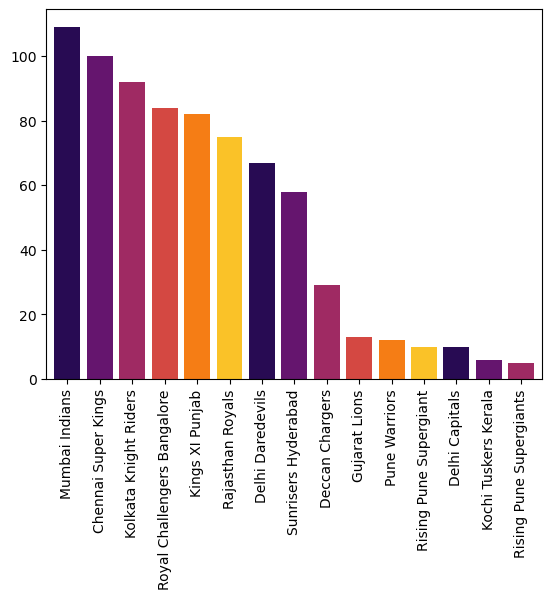

In [40]:
pd.value_counts(df['winner']).plot.bar(width=0.8, color=sns.color_palette('inferno'))

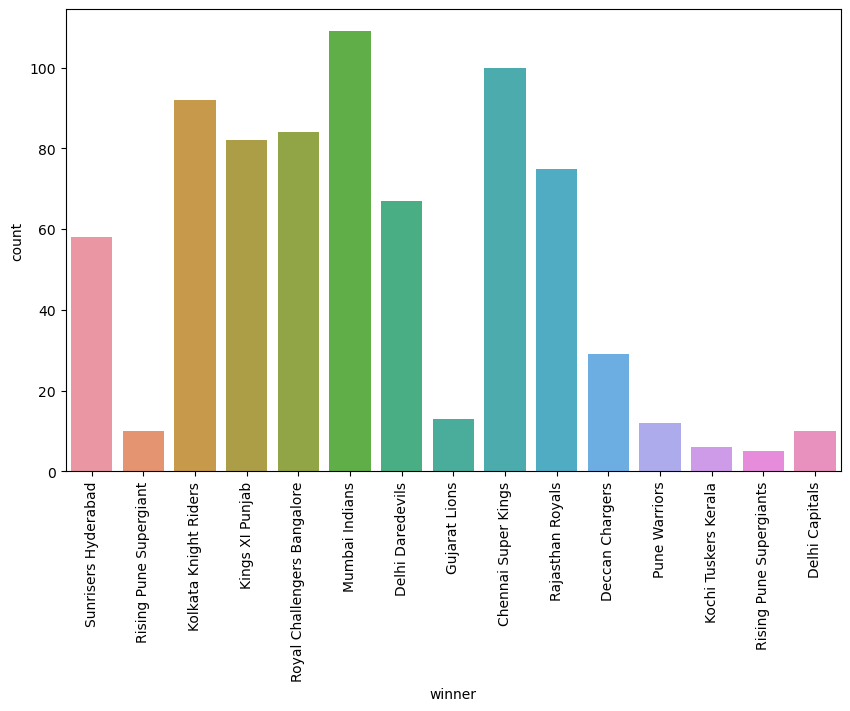

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='winner', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
season_winner = df.drop_duplicates('season','last')[['season','winner']].reset_index(drop=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_30732\2165721924.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only.
  season_winner = df.drop_duplicates('season','last')[['season','winner']].reset_index(drop=True)


In [45]:
season_winner.head()

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings


In [47]:
result = pd.value_counts(season_winner['winner'])

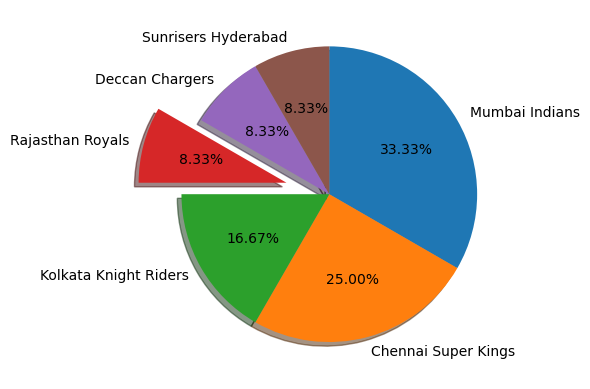

In [56]:
plt.pie(result, labels=result.index, autopct='%1.2f%%', shadow=True,
       startangle=90, counterclock=False, explode=(0,0,0,0.3,0,0))
plt.show()

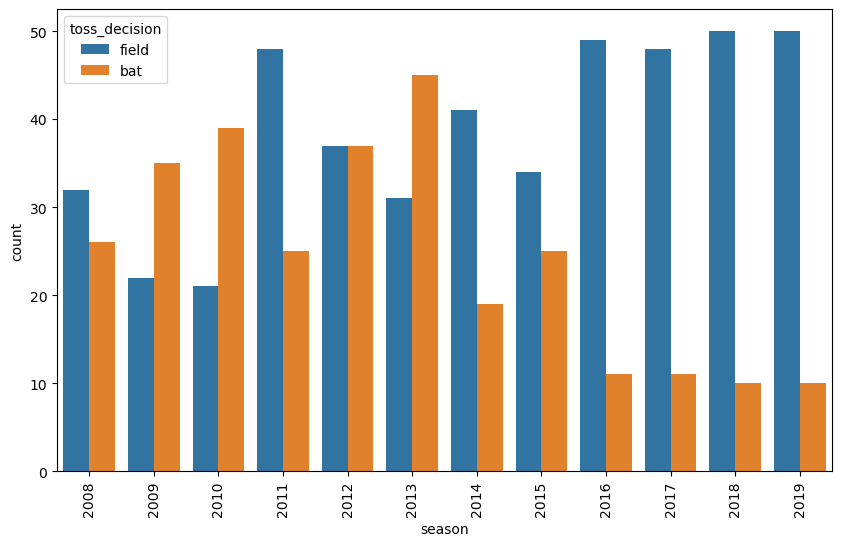

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=df, hue='toss_decision')
plt.xticks(rotation='vertical')
plt.show()